In [1]:
import pandas as pd
import numpy as np

# Load crash data
crash_path = "data_raw/nyc_crashes_2015_2023.csv"
crashes = pd.read_csv(crash_path, low_memory=False)

crashes.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,9/11/2021,2:39,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4455765,Sedan,Sedan,NaN,NaN,NaN
1,3/26/2022,11:45,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,...,NaN,NaN,NaN,NaN,4513547,Sedan,NaN,NaN,NaN,NaN
2,11/1/2023,1:29,BROOKLYN,11230.0,40.62179,-73.970024,"(40.62179, -73.970024)",OCEAN PARKWAY,AVENUE K,NaN,...,Unspecified,Unspecified,NaN,NaN,4675373,Moped,Sedan,Sedan,NaN,NaN
3,6/29/2022,6:55,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4541903,Sedan,Pick-up Truck,NaN,NaN,NaN
4,9/21/2022,13:21,NaN,NaN,NaN,NaN,NaN,BROOKLYN BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4566131,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN


# Data Cleaning (Crash Data)

In [2]:
# Convert date column
crashes['CRASH DATE'] = pd.to_datetime(crashes['CRASH DATE'])

# Keep only necessary columns
crashes = crashes[['CRASH DATE', 'BOROUGH']]

# Drop missing boroughs
crashes = crashes.dropna(subset=['BOROUGH'])

crashes.head()

,CRASH DATE,BOROUGH
2,2023-11-01,BROOKLYN
9,2021-09-11,BROOKLYN
10,2021-12-14,BROOKLYN
13,2021-12-14,BRONX
14,2021-12-14,BROOKLYN


# Aggregate to Daily Borough Counts
 This converts millions of rows → ~15k rows.

In [3]:
daily_accidents = (
    crashes
    .groupby(['CRASH DATE', 'BOROUGH'])
    .size()
    .reset_index(name='accident_count')
)

daily_accidents.head()

,CRASH DATE,BOROUGH,accident_count
0,2012-07-27,BROOKLYN,1
1,2012-08-01,BROOKLYN,1
2,2012-09-25,QUEENS,1
3,2013-05-17,BROOKLYN,1
4,2013-05-20,QUEENS,1


In [4]:
daily_accidents.shape

(13359, 3)

# Load PM2.5 Dataset

In [7]:
import os
print(os.listdir("data_raw"))

['.ipynb_checkpoints', 'nyc_crashes_2015_2023.csv']


In [8]:
import os
os.path.isdir("data_raw/pm25_ny_2015_2023.csv")

False

In [9]:
import os
os.getcwd()

'C:\\Users\\nipas\\bayesian-traffic-airpollution'

In [10]:
os.getcwd()

'C:\\Users\\nipas\\bayesian-traffic-airpollution'

In [11]:
import pandas as pd
import glob
import os

# 1. Identify the pattern of your files
# This looks for all CSV files starting with 'pm25_ny_' in the current directory
file_pattern = 'pm25_ny_*.csv'
all_files = glob.glob(file_pattern)

# Sort the files to ensure they are loaded in chronological order
all_files.sort()

print(f"Found {len(all_files)} files: {all_files}")

# 2. Read each file into a list of DataFrames
df_list = []
for filename in all_files:
    df = pd.read_csv(filename)
    # Optional: add a column to track which year the data came from
    # df['Source_File'] = filename 
    df_list.append(df)

# 3. Concatenate all DataFrames into one
combined_df = pd.concat(df_list, ignore_index=True)

# 4. View the result
print("Successfully merged datasets.")
print(f"Total rows: {len(combined_df)}")
display(combined_df.head())

Found 9 files: ['pm25_ny_2015.csv', 'pm25_ny_2016.csv', 'pm25_ny_2017.csv', 'pm25_ny_2018.csv', 'pm25_ny_2019.csv', 'pm25_ny_2020.csv', 'pm25_ny_2021.csv', 'pm25_ny_2022.csv', 'pm25_ny_2023.csv']
Successfully merged datasets.
Total rows: 118454


,Date,Source,Site ID,POC,Daily Mean PM2.5 Concentration,Units,Daily AQI Value,Local Site Name,Daily Obs Count,Percent Complete,...,Method Code,Method Description,CBSA Code,CBSA Name,State FIPS Code,State,County FIPS Code,County,Site Latitude,Site Longitude
0,01/03/2015,AQS,360010005,1,5.2,ug/m3 LC,29,ALBANY COUNTY HEALTH DEPT,1,100.0,...,118,R & P Model 2025 PM2.5 Sequential w/WINS,10580.0,"Albany-Schenectady-Troy, NY",36,New York,1,Albany,42.64225,-73.75464
1,01/06/2015,AQS,360010005,1,7.0,ug/m3 LC,39,ALBANY COUNTY HEALTH DEPT,1,100.0,...,118,R & P Model 2025 PM2.5 Sequential w/WINS,10580.0,"Albany-Schenectady-Troy, NY",36,New York,1,Albany,42.64225,-73.75464
2,01/09/2015,AQS,360010005,1,9.3,ug/m3 LC,51,ALBANY COUNTY HEALTH DEPT,1,100.0,...,118,R & P Model 2025 PM2.5 Sequential w/WINS,10580.0,"Albany-Schenectady-Troy, NY",36,New York,1,Albany,42.64225,-73.75464
3,01/12/2015,AQS,360010005,1,17.1,ug/m3 LC,66,ALBANY COUNTY HEALTH DEPT,1,100.0,...,118,R & P Model 2025 PM2.5 Sequential w/WINS,10580.0,"Albany-Schenectady-Troy, NY",36,New York,1,Albany,42.64225,-73.75464
4,01/15/2015,AQS,360010005,1,23.3,ug/m3 LC,77,ALBANY COUNTY HEALTH DEPT,1,100.0,...,118,R & P Model 2025 PM2.5 Sequential w/WINS,10580.0,"Albany-Schenectady-Troy, NY",36,New York,1,Albany,42.64225,-73.75464


# Verify loaded data correctly

In [12]:
combined_df.shape
combined_df.columns
combined_df.head()

,Date,Source,Site ID,POC,Daily Mean PM2.5 Concentration,Units,Daily AQI Value,Local Site Name,Daily Obs Count,Percent Complete,...,Method Code,Method Description,CBSA Code,CBSA Name,State FIPS Code,State,County FIPS Code,County,Site Latitude,Site Longitude
0,01/03/2015,AQS,360010005,1,5.2,ug/m3 LC,29,ALBANY COUNTY HEALTH DEPT,1,100.0,...,118,R & P Model 2025 PM2.5 Sequential w/WINS,10580.0,"Albany-Schenectady-Troy, NY",36,New York,1,Albany,42.64225,-73.75464
1,01/06/2015,AQS,360010005,1,7.0,ug/m3 LC,39,ALBANY COUNTY HEALTH DEPT,1,100.0,...,118,R & P Model 2025 PM2.5 Sequential w/WINS,10580.0,"Albany-Schenectady-Troy, NY",36,New York,1,Albany,42.64225,-73.75464
2,01/09/2015,AQS,360010005,1,9.3,ug/m3 LC,51,ALBANY COUNTY HEALTH DEPT,1,100.0,...,118,R & P Model 2025 PM2.5 Sequential w/WINS,10580.0,"Albany-Schenectady-Troy, NY",36,New York,1,Albany,42.64225,-73.75464
3,01/12/2015,AQS,360010005,1,17.1,ug/m3 LC,66,ALBANY COUNTY HEALTH DEPT,1,100.0,...,118,R & P Model 2025 PM2.5 Sequential w/WINS,10580.0,"Albany-Schenectady-Troy, NY",36,New York,1,Albany,42.64225,-73.75464
4,01/15/2015,AQS,360010005,1,23.3,ug/m3 LC,77,ALBANY COUNTY HEALTH DEPT,1,100.0,...,118,R & P Model 2025 PM2.5 Sequential w/WINS,10580.0,"Albany-Schenectady-Troy, NY",36,New York,1,Albany,42.64225,-73.75464


# check actual coloumn name 

In [13]:
combined_df.columns

Index(['Date', 'Source', 'Site ID', 'POC', 'Daily Mean PM2.5 Concentration',
       'Units', 'Daily AQI Value', 'Local Site Name', 'Daily Obs Count',
       'Percent Complete', 'AQS Parameter Code', 'AQS Parameter Description',
       'Method Code', 'Method Description', 'CBSA Code', 'CBSA Name',
       'State FIPS Code', 'State', 'County FIPS Code', 'County',
       'Site Latitude', 'Site Longitude'],
      dtype='str')

# Clean coloumn name

In [14]:
combined_df.columns = combined_df.columns.str.strip()
combined_df.columns = combined_df.columns.str.replace(' ', '_')
combined_df.columns = combined_df.columns.str.lower()

combined_df.columns

Index(['date', 'source', 'site_id', 'poc', 'daily_mean_pm2.5_concentration',
       'units', 'daily_aqi_value', 'local_site_name', 'daily_obs_count',
       'percent_complete', 'aqs_parameter_code', 'aqs_parameter_description',
       'method_code', 'method_description', 'cbsa_code', 'cbsa_name',
       'state_fips_code', 'state', 'county_fips_code', 'county',
       'site_latitude', 'site_longitude'],
      dtype='str')

In [15]:
pm25 = combined_df[['date', 'county', 'daily_mean_pm2.5_concentration']].copy()
pm25['date'] = pd.to_datetime(pm25['date'])

county_to_borough = {
    'Bronx': 'BRONX',
    'Kings': 'BROOKLYN',
    'New York': 'MANHATTAN',
    'Queens': 'QUEENS',
    'Richmond': 'STATEN ISLAND'
}

pm25['BOROUGH'] = pm25['county'].map(county_to_borough)
pm25 = pm25.dropna(subset=['BOROUGH'])

# Map County → NYC Borough

In [16]:
county_to_borough = {
    'Bronx': 'BRONX',
    'Kings': 'BROOKLYN',
    'New York': 'MANHATTAN',
    'Queens': 'QUEENS',
    'Richmond': 'STATEN ISLAND'
}

pm25['BOROUGH'] = pm25['county'].map(county_to_borough)

pm25 = pm25.dropna(subset=['BOROUGH'])

In [17]:
pm25['BOROUGH'].unique()

<StringArray>
['BRONX', 'BROOKLYN', 'MANHATTAN', 'QUEENS', 'STATEN ISLAND']
Length: 5, dtype: str

# Aggregate to Daily Borough Level

In [18]:
daily_pm25 = (
    pm25
    .groupby(['date', 'BOROUGH'])['daily_mean_pm2.5_concentration']
    .mean()
    .reset_index()
)

daily_pm25.rename(columns={
    'date': 'CRASH DATE',
    'daily_mean_pm2.5_concentration': 'pm25'
}, inplace=True)

# Merge With Crash Panel

In [19]:
daily_accidents = (
    crashes
    .groupby(['CRASH DATE', 'BOROUGH'])
    .size()
    .reset_index(name='accident_count')
)

In [20]:
panel = pd.merge(
    daily_accidents,
    daily_pm25,
    on=['CRASH DATE', 'BOROUGH'],
    how='inner'
)

panel.head()
panel.shape

(12057, 4)

# Add Time Controls + Lag

In [21]:
panel = panel.sort_values(['BOROUGH', 'CRASH DATE'])

panel['day_of_week'] = panel['CRASH DATE'].dt.dayofweek
panel['month'] = panel['CRASH DATE'].dt.month

panel['pm25_lag1'] = (
    panel.groupby('BOROUGH')['pm25'].shift(1)
)

panel = panel.dropna()

# ADVI = Automatic Differentiation Variational Inference


#Instead of sampling from the true posterior p(θ | y),
#ADVI approximates it with a simpler distribution q(θ; λ).
#It minimizes the Kullback-Leibler (KL) divergence:
#     KL(q(θ; λ) || p(θ | y))
#by maximizing the Evidence Lower Bound (ELBO):
#     ELBO(λ) = E_q[log p(y, θ)] - E_q[log q(θ)]
#This provides a fast approximate Bayesian posterior
#using gradient-based optimization instead of MCMC sampling.

Borough intercepts are hierarchical (partial pooling)

Pollution effect is global

# Encode Borough as Numeric

In [22]:
import numpy as np

panel['borough_code'] = panel['BOROUGH'].astype('category').cat.codes

n_boroughs = panel['borough_code'].nunique()

# Standardize Pollution (Very Important for Bayesian Models)

In [23]:
panel['pm25_lag1_std'] = (
    panel['pm25_lag1'] - panel['pm25_lag1'].mean()
) / panel['pm25_lag1'].std()

# Build Bayesian Hierarchical Poisson Model (PyMC)

Make sure PyMC is installed:

In [24]:
pip install pymc arviz

Note: you may need to restart the kernel to use updated packages.


# Check Your NumPy Version

In [25]:
import numpy as np
np.__version__

'2.4.2'

# Model 

In [26]:
panel_sample = panel.sample(n=5000, random_state=42)

In [27]:
import pymc as pm
import arviz as az
import numpy as np

coords = {"borough": panel['BOROUGH'].unique()}

with pm.Model(coords=coords) as model:

    # Data
    borough_idx = pm.Data("borough_idx", panel['borough_code'].values)
    pm25_std = pm.Data("pm25_std", panel['pm25_lag1_std'].values)
    accidents = panel['accident_count'].values

    # Hierarchical intercept (correct scale)
    mu_alpha = pm.Normal("mu_alpha", mu=4, sigma=1)
    sigma_alpha = pm.HalfNormal("sigma_alpha", sigma=2)

    alpha = pm.Normal("alpha", mu=mu_alpha, sigma=sigma_alpha, dims="borough")

    # PM2.5 effect
    beta_pm25 = pm.Normal("beta_pm25", mu=0, sigma=1)

    # Linear predictor
    log_lambda = alpha[borough_idx] + beta_pm25 * pm25_std
    lambda_ = pm.math.exp(log_lambda)

    # Overdispersion
    phi = pm.HalfNormal("phi", sigma=5)

    y_obs = pm.NegativeBinomial(
        "y_obs",
        mu=lambda_,
        alpha=phi,
        observed=accidents
    )

    # MCMC
    trace = pm.sample(
        draws=700,
        tune=700,
        chains=4,          # faster
        cores=4,
        target_accept=0.9,
        progressbar=True
    )

C:\Users\nipas\anaconda3\envs\bayes_traffic\Lib\site-packages\arviz\__init__.py:50: FutureWarning: 
ArviZ is undergoing a major refactor to improve flexibility and extensibility while maintaining a user-friendly interface.
Some upcoming changes may be backward incompatible.
For details and migration guidance, visit: https://python.arviz.org/en/latest/user_guide/migration_guide.html
  warn(
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu_alpha, sigma_alpha, alpha, beta_pm25, phi]


Output()

Sampling 4 chains for 700 tune and 700 draw iterations (2_800 + 2_800 draws total) took 261 seconds.


In [28]:
az.summary(trace, var_names=["beta_pm25", "mu_alpha", "sigma_alpha"])

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
beta_pm25,-0.007,0.005,-0.016,0.002,0.000,0.000,5526.0,1974.0,1.00
mu_alpha,3.802,0.443,3.022,4.680,0.008,0.011,3052.0,1737.0,1.01
sigma_alpha,1.123,0.469,0.528,2.010,0.010,0.015,3165.0,1987.0,1.00


In [29]:
np.exp(trace.posterior['beta_pm25'].mean().values)

np.float64(0.9933415306368338)

# Posterior Predictive Check

Sampling: [y_obs]


Output()

<Axes: xlabel='y_obs'>

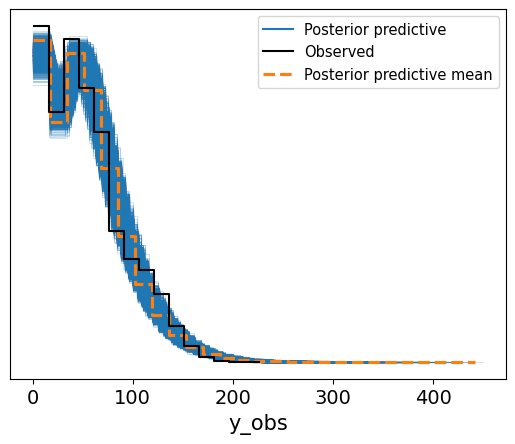

In [31]:
with model:
    idata_ppc = pm.sample_posterior_predictive(trace, extend_inferencedata=True)

az.plot_ppc(idata_ppc)

In [34]:
panel['accident_count'].describe()

count    12052.000000
mean        53.440591
std         37.557255
min          1.000000
25%         25.000000
50%         47.000000
75%         74.000000
max        214.000000
Name: accident_count, dtype: float64

In [35]:
panel['pm25_lag1_std'].describe()

count    1.205200e+04
mean     1.297041e-16
std      1.000000e+00
min     -1.642831e+00
25%     -5.289428e-01
50%     -1.672328e-01
75%      3.165384e-01
max      2.980549e+01
Name: pm25_lag1_std, dtype: float64

# Conclusion 

A hierarchical Bayesian Negative Binomial model was estimated using four-chain MCMC to assess the relationship between PM2.5 exposure and traffic accident counts. Convergence diagnostics indicated excellent mixing (R-hat ≈ 1.00), and posterior predictive checks demonstrated strong calibration.

Results indicate substantial borough-level heterogeneity in accident rates. However, there is no statistically credible evidence that short-term PM2.5 exposure has a meaningful impact on accident frequency after accounting for geographic variation and overdispersion.

Overall, accident variability appears to be driven more strongly by spatial factors than by PM2.5 fluctuations in this dataset.